# Plot standard and normalised power curves for all 25 turbines

In [1]:
# import libraries
import pandas as pd
import itertools
import matplotlib.pyplot as plt

In [2]:
# configure plot styles
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = "Source Sans Pro"
plt.rcParams["figure.dpi"] = 96
plt.rcParams["axes.grid"] = False
plt.rcParams["figure.titleweight"] = "semibold"
plt.rcParams["axes.titleweight"] = "semibold"
plt.rcParams["figure.titlesize"] = "13"
plt.rcParams["axes.titlesize"] = "12"
plt.rcParams["axes.labelsize"] = "10"

In [3]:
# create dataframe from CSV
power = pd.read_csv(
    "data/processed/SCADA_timeseries.csv", skip_blank_lines=True
)

In [4]:
# standard power curves
# create pivot table (new dataframe)
power = pd.pivot_table(
    power, index=["ws_av"], columns=["turbine"], values=["ap_av"]
)

In [5]:
# removing pivot table values name from heading
power.columns = power.columns.droplevel(0)

In [6]:
# rename index (x-axis title)
power.index.name = "Wind speed (m/s)"

In [7]:
power

turbine            1    2    3    4    5         6    7    8    9    10  ...  \
Wind speed (m/s)                                                         ...   
0.000000          0.0  0.0  0.0  0.0  0.0  0.050226  0.0  0.0  0.0  0.0  ...   
0.000007          0.0  NaN  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN  ...   
0.000007          NaN  NaN  NaN  NaN  NaN  0.000000  NaN  NaN  NaN  NaN  ...   
0.000007          NaN  NaN  NaN  NaN  NaN  0.000000  NaN  NaN  NaN  NaN  ...   
0.000007          0.0  NaN  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN  ...   
...               ...  ...  ...  ...  ...       ...  ...  ...  ...  ...  ...   
36.467920         NaN  NaN  NaN  NaN  0.0       NaN  NaN  NaN  NaN  NaN  ...   
36.558680         NaN  NaN  NaN  NaN  0.0       NaN  NaN  NaN  NaN  NaN  ...   
37.271650         NaN  NaN  NaN  NaN  NaN       NaN  NaN  NaN  NaN  NaN  ...   
37.332910         NaN  NaN  NaN  NaN  0.0       NaN  NaN  NaN  NaN  NaN  ...   
37.413030         NaN  NaN  0.0  NaN  NaN       NaN  NaN  NaN  NaN  NaN  ...   

turbine            16   17   18   19   20   21   22   23   24   25  
Wind speed (m/s)                                                    
0.000000          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0.000007          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
0.000007          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
0.000007          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
0.000007          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...               ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
36.467920         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
36.558680         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
37.271650         NaN  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
37.332910         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
37.413030         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[2641616 rows x 25 columns]

In [8]:
# get coordinates of each subplot
layout = list(range(0, 5))
coord = list(itertools.product(layout, layout))

# list of column headers (i.e. turbines 1 to 25)
cols = list(power)

## Standard power curves

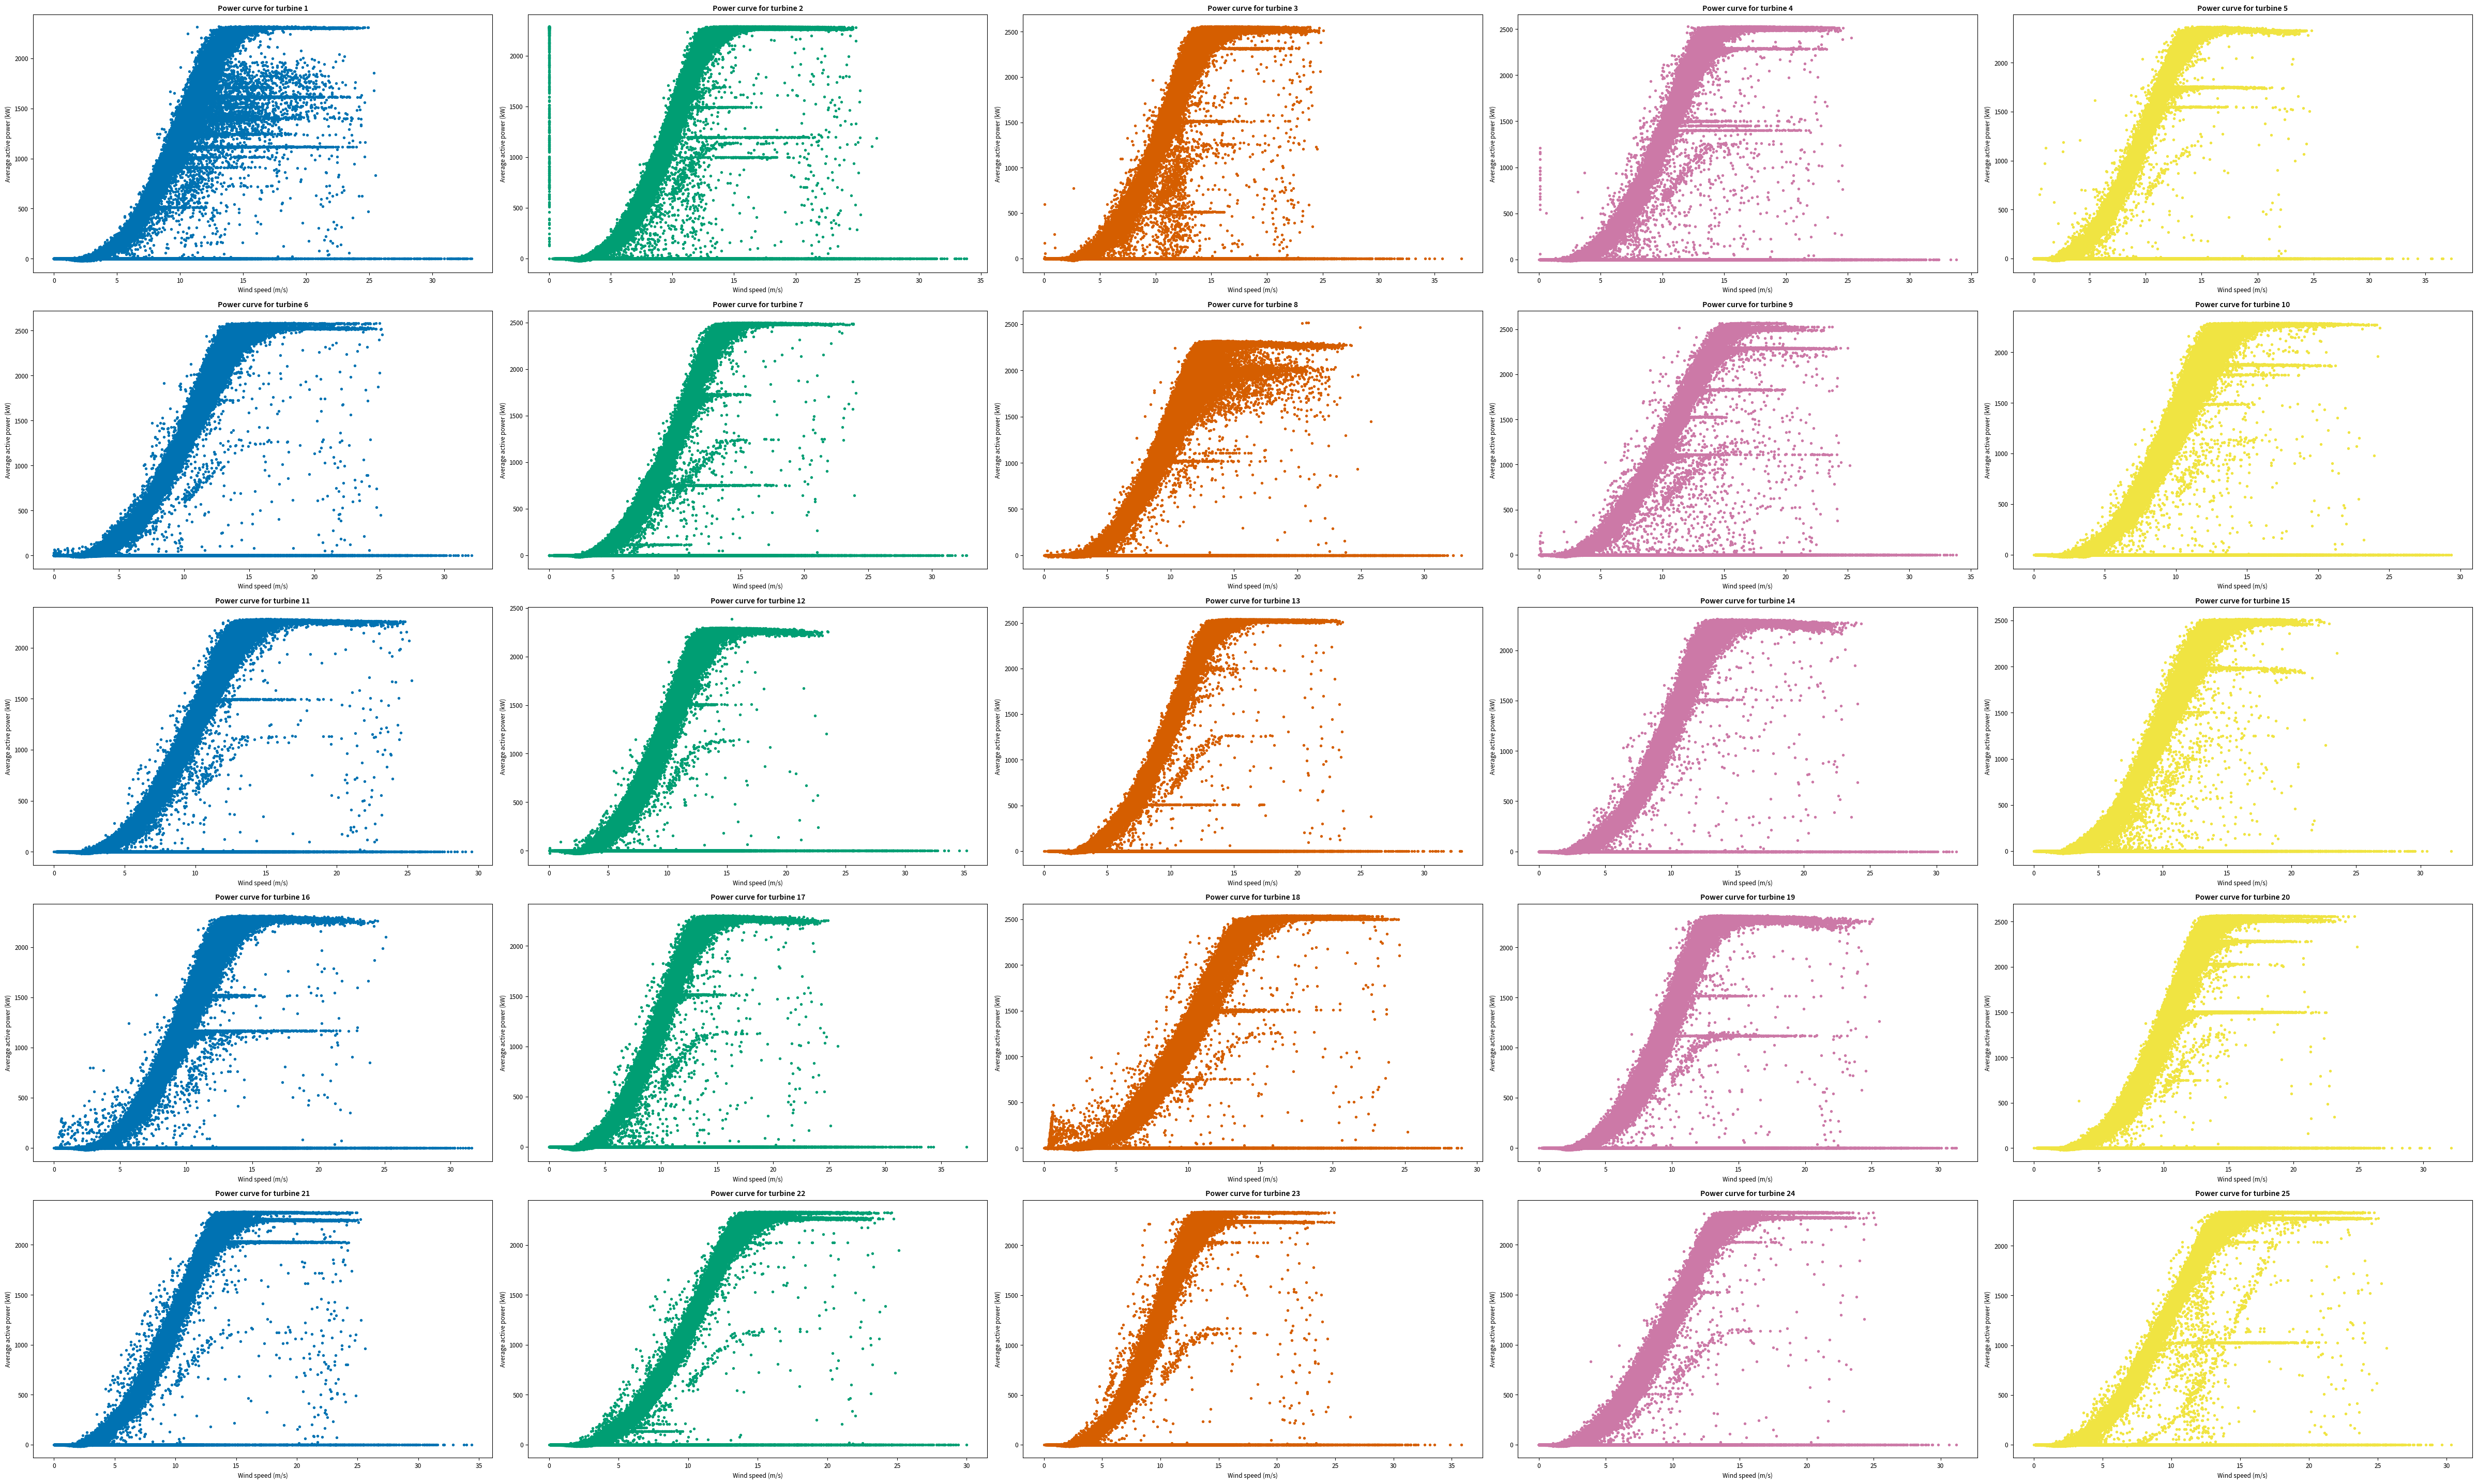

In [9]:
# plotting all columns (i.e. turbines 1 to 25) in the same figure
fig, axs = plt.subplots(ncols=5, nrows=5, figsize=(50, 30))

for (x, y), col in zip(coord, cols):
    axs[x, y].scatter(x=power.index, y=power[col], marker=".", c="C"+str(y))
    axs[x, y].set_title("Power curve for turbine " + str(col))
    axs[x, y].set_xlabel("Wind speed (m/s)")
    axs[x, y].set_ylabel("Average active power (kW)")

fig.tight_layout()
plt.show()

## Normalised power curves

In [10]:
# normalised power curves
# normalise using feature scaling (all values in the range [0, 1])
power_norm = (power - power.min()) / (power.max() - power.min())
power_norm.index = (
    (power.index - power.index.min()) / (power.index.max() - power.index.min())
)

In [11]:
# rename index
power_norm.index.name = "Wind speed"

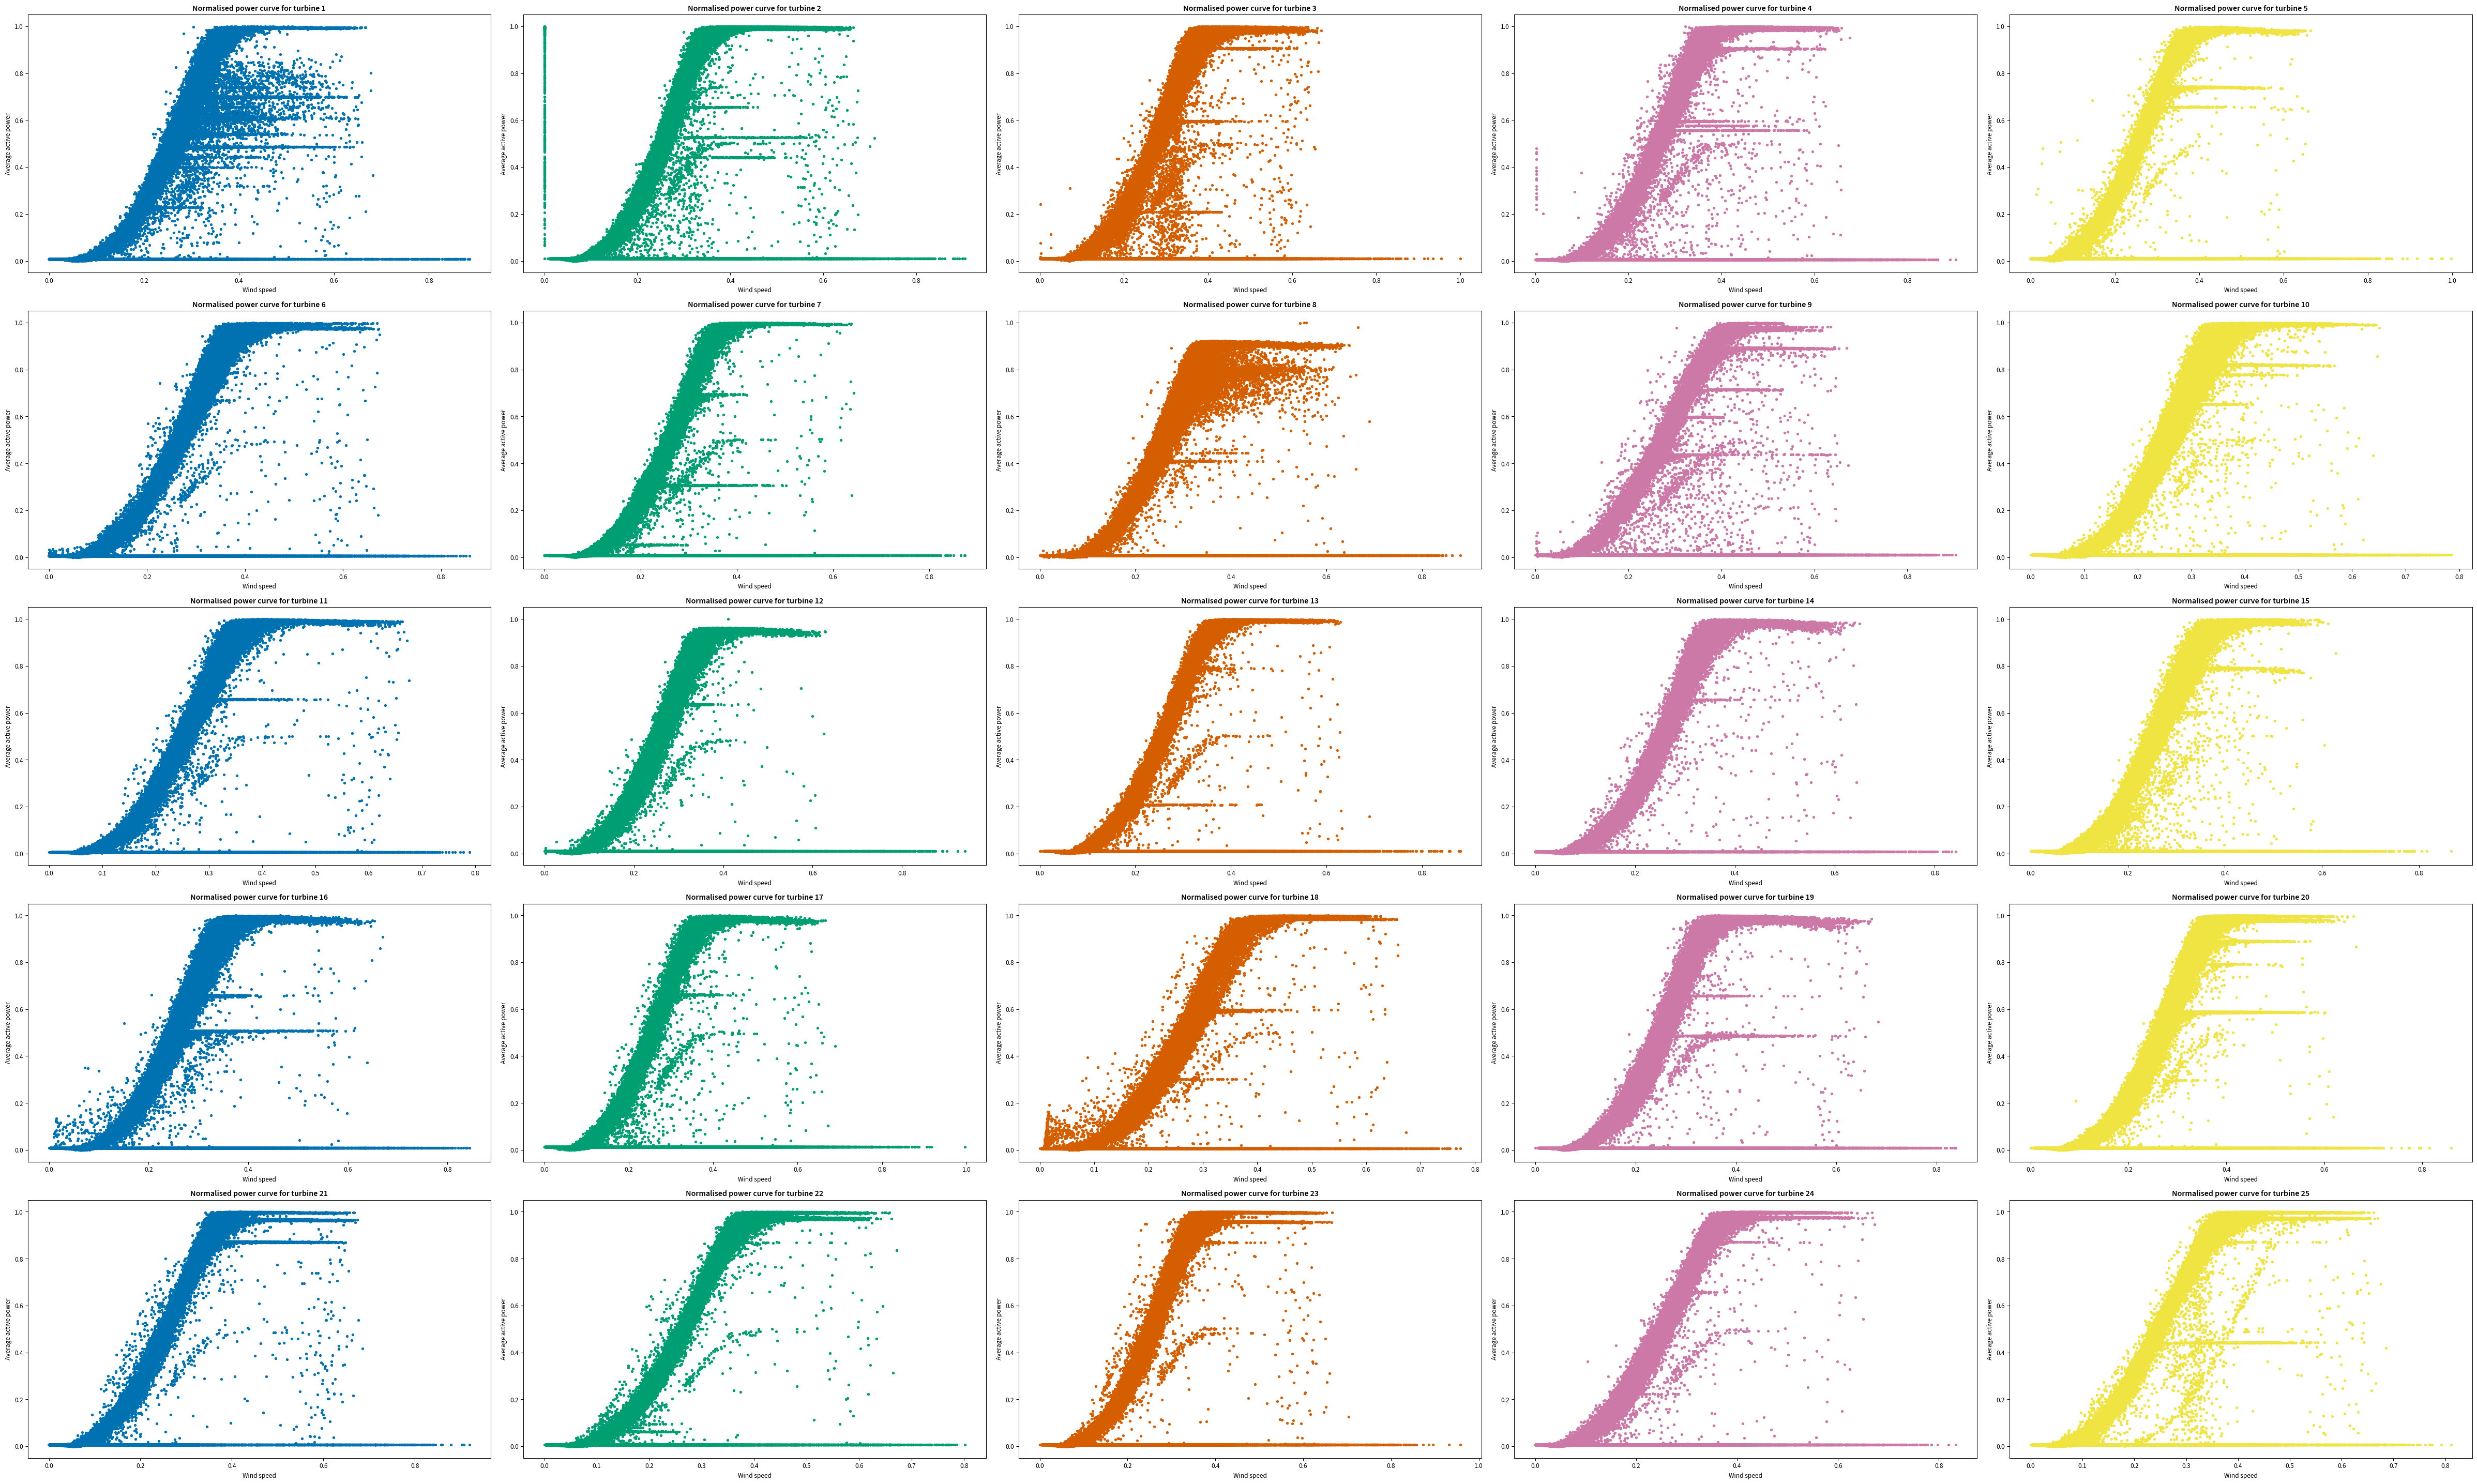

In [12]:
fig, axs = plt.subplots(ncols=5, nrows=5, figsize=(50, 30))

for (x, y), col in zip(coord, cols):
    axs[x, y].scatter(
        x=power_norm.index, y=power_norm[col], marker=".", c="C"+str(y)
    )
    axs[x, y].set_title("Normalised power curve for turbine " + str(col))
    axs[x, y].set_xlabel("Wind speed")
    axs[x, y].set_ylabel("Average active power")

fig.tight_layout()
plt.show()